In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [5]:
# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

In [6]:
# Preprocess data
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)
df.head()

,Temperature,Humidity,Wind,Play,overcast,rainy,sunny
0,85.0,85.0,0,0,0,0,1
1,80.0,90.0,1,0,0,0,1
2,83.0,78.0,0,1,1,0,0
3,70.0,96.0,0,1,0,1,0
4,68.0,80.0,0,1,0,1,0


In [7]:
# Reorder the columns
df = df[['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']]
df

,sunny,overcast,rainy,Temperature,Humidity,Wind,Play
0,1,0,0,85.0,85.0,0,0
1,1,0,0,80.0,90.0,1,0
2,0,1,0,83.0,78.0,0,1
3,0,0,1,70.0,96.0,0,1
4,0,0,1,68.0,80.0,0,1
5,0,0,1,65.0,70.0,1,0
6,0,1,0,64.0,65.0,1,1
7,1,0,0,72.0,95.0,0,0
8,1,0,0,69.0,70.0,0,1
9,0,0,1,75.0,80.0,0,1


In [8]:
# Prepare features and target
X, y = df.drop(columns='Play'), df['Play']

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)


In [10]:
# Display results
print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
0       1         0      0         85.0      85.0     0     0
1       1         0      0         80.0      90.0     1     0
2       0         1      0         83.0      78.0     0     1
3       0         0      1         70.0      96.0     0     1
4       0         0      1         68.0      80.0     0     1
5       0         0      1         65.0      70.0     1     0
6       0         1      0         64.0      65.0     1     1
7       1         0      0         72.0      95.0     0     0
8       1         0      0         69.0      70.0     0     1
9       0         0      1         75.0      80.0     0     1
10      1         0      0         75.0      70.0     1     1
11      0         1      0         72.0      90.0     1     1
12      0         1      0         81.0      75.0     0     1
13      0         0      1         71.0      80.0     1     0 

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
14    

In [11]:
def potential_split_points(attr_name, attr_values):
    sorted_attr = np.sort(attr_values)
    unique_values = np.unique(sorted_attr)
    split_points = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    return {attr_name: split_points}

# Calculate and display potential split points for all columns
for column in X_train.columns:
    splits = potential_split_points(column, X_train[column])
    for attr, points in splits.items():
        print(f"{attr:11}: {points}")

sunny      : [0.5]
overcast   : [0.5]
rainy      : [0.5]
Temperature: [64.5, 66.5, 68.5, 69.5, 70.5, 71.5, 73.5, 77.5, 80.5, 82.0, 84.0]
Humidity   : [67.5, 72.5, 76.5, 79.0, 82.5, 87.5, 92.5, 95.5]
Wind       : [0.5]


In [12]:
def gini_impurity(y):
    p = np.bincount(y) / len(y)
    return 1 - np.sum(p**2)

def weighted_average_impurity(y, split_index):
    n = len(y)
    left_impurity = gini_impurity(y[:split_index])
    right_impurity = gini_impurity(y[split_index:])
    return (split_index * left_impurity + (n - split_index) * right_impurity) / n


In [13]:
# Sort 'sunny' feature and corresponding labels
sunny = X_train['sunny']
sorted_indices = np.argsort(sunny)
sorted_sunny = sunny.iloc[sorted_indices]
sorted_labels = y_train.iloc[sorted_indices]


In [14]:
# Find split index for 0.5
split_index = np.searchsorted(sorted_sunny, 0.5, side='right')

# Calculate impurity
impurity = weighted_average_impurity(sorted_labels, split_index)

print(f"Weighted average impurity for 'sunny' at split point 0.5: {impurity:.3f}")

Weighted average impurity for 'sunny' at split point 0.5: 0.394


In [15]:
def calculate_split_impurities(X, y):
    split_data = []

    for feature in X.columns:
        sorted_indices = np.argsort(X[feature])
        sorted_feature = X[feature].iloc[sorted_indices]
        sorted_y = y.iloc[sorted_indices]

        unique_values = sorted_feature.unique()
        split_points = (unique_values[1:] + unique_values[:-1]) / 2

        for split in split_points:
            split_index = np.searchsorted(sorted_feature, split, side='right')
            impurity = weighted_average_impurity(sorted_y, split_index)
            split_data.append({
                'feature': feature,
                'split_point': split,
                'weighted_avg_impurity': impurity
            })

    return pd.DataFrame(split_data)

# Calculate split impurities for all features
calculate_split_impurities(X_train, y_train).round(3)

,feature,split_point,weighted_avg_impurity
0,sunny,0.5,0.394
1,overcast,0.5,0.357
2,rainy,0.5,0.457
3,Temperature,64.5,0.440
4,Temperature,66.5,0.452
5,Temperature,68.5,0.459
6,Temperature,69.5,0.450
7,Temperature,70.5,0.432
8,Temperature,71.5,0.458
9,Temperature,73.5,0.458


In [16]:
# Calculate split impurities forselected index
selected_index = [4,8,3,13,7,9,10] # Change it depending on which indices you want to check
calculate_split_impurities(X_train.iloc[selected_index], y_train.iloc[selected_index]).round(3)


,feature,split_point,weighted_avg_impurity
0,sunny,0.5,0.405
1,rainy,0.5,0.405
2,Temperature,68.5,0.381
3,Temperature,69.5,0.343
4,Temperature,70.5,0.286
5,Temperature,71.5,0.405
6,Temperature,73.5,0.343
7,Humidity,75.0,0.343
8,Humidity,87.5,0.371
9,Humidity,95.5,0.381


In [17]:
from sklearn.tree import DecisionTreeClassifier

# The whole Training Phase above is done inside sklearn like this
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

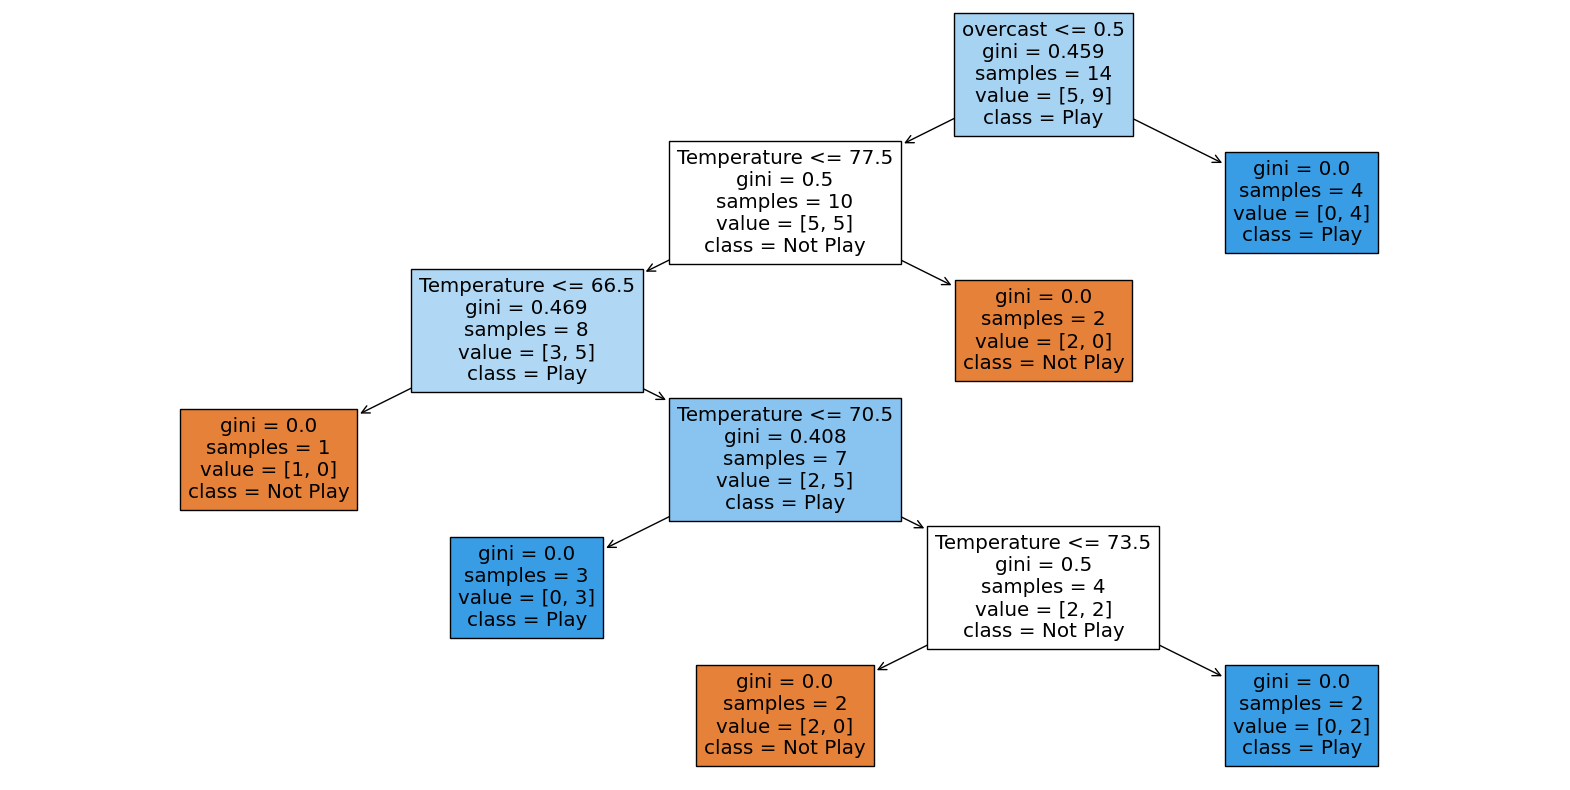

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Not Play', 'Play'])
plt.show()

In [19]:
# Make predictions
y_pred = dt_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 0 1 0 1 0 1]


In [20]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7142857142857143


In [ ]:
# simplified analysis steps

Accuracy: 0.7142857142857143


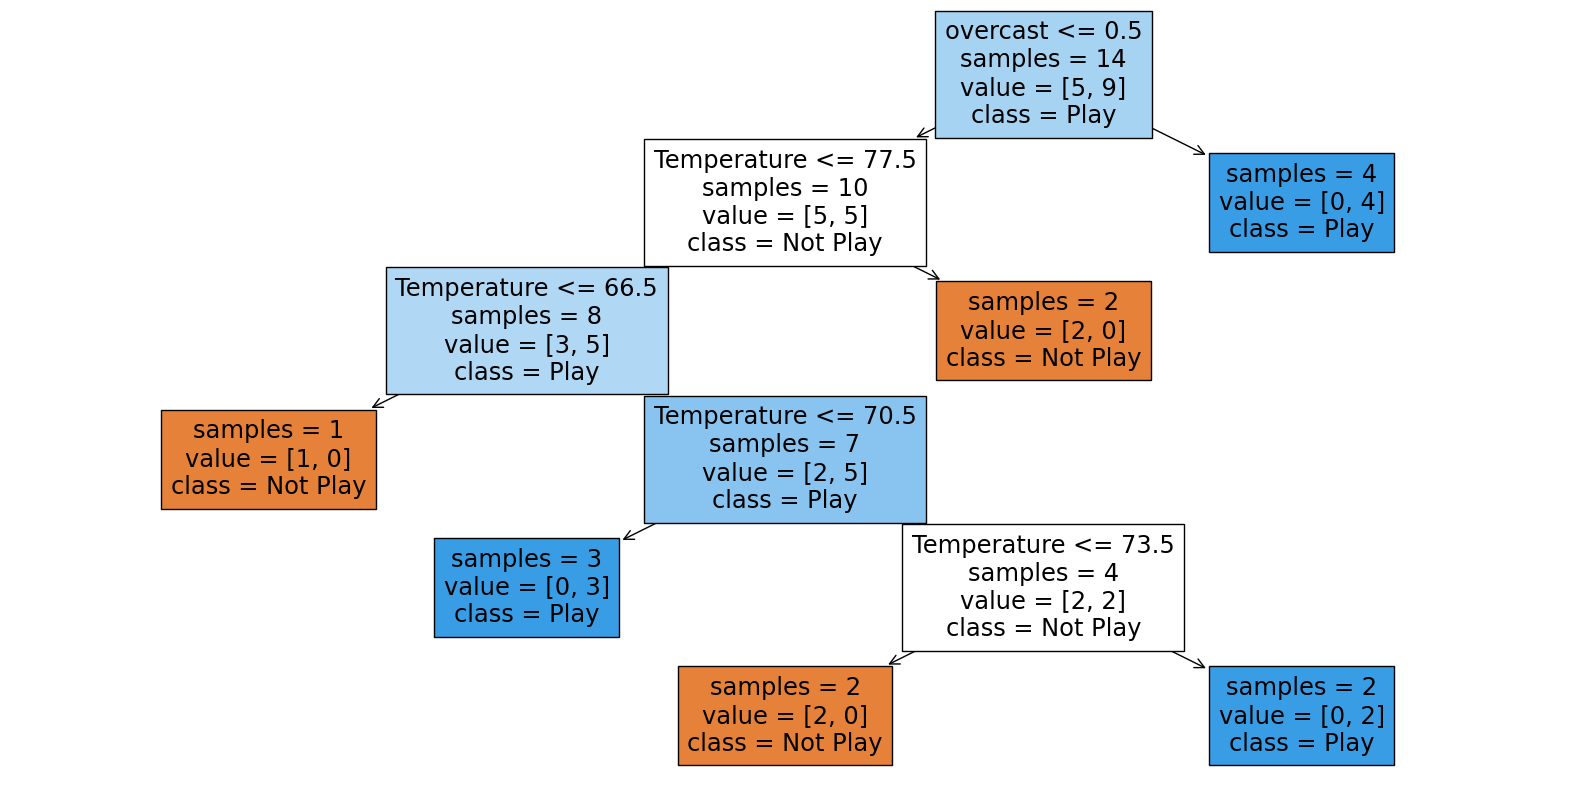

In [21]:
# Split data
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Train model
dt_clf = DecisionTreeClassifier(
    max_depth=None,           # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()